In [3]:
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
import missingno as msno

xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')       
sheet2 = xls.parse(1). #extract sheets
sheet3 = xls.parse(2)
sheet4 = xls.parse(3)
sheet5 = xls.parse(4)

In [0]:
transactions=pd.DataFrame(sheet2) #create dataframes
new_customer_lists=pd.DataFrame(sheet3)
customer_demographic=pd.DataFrame(sheet4)
customer_add=pd.DataFrame(sheet5)

In [0]:
transactions.columns=transactions.iloc[0,:].values   #replace columns
new_customer_lists.columns=new_customer_lists.iloc[0,:].values
customer_demographic.columns=customer_demographic.iloc[0,:].values
customer_add.columns=customer_add.iloc[0,:].values

In [0]:
transactions=transactions[1:]    #eliminate first row
new_customer_lists=new_customer_lists[1:] 
customer_demographic=customer_demographic[1:] 
customer_add=customer_add[1:] 

## **EDA Transactions Dataset**

In [159]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [93]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   brand                    19803 non-null  object
 6   product_line             19803 non-null  object
 7   product_class            19803 non-null  object
 8   product_size             19803 non-null  object
 9   list_price               20000 non-null  object
 10  standard_cost            19803 non-null  object
 11  product_first_sold_date  19803 non-null  object
 12  order_status_Approved    20000 non-null  uint8 
 13  order_status_Cancelled   20000 non-null  uint8 
dtypes: object(12), uint8(2)
memory usage: 

In [0]:
#Convert to dates format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'],format='%Y%m%d')
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'],format='%Y%m%d')

# **Missing values**

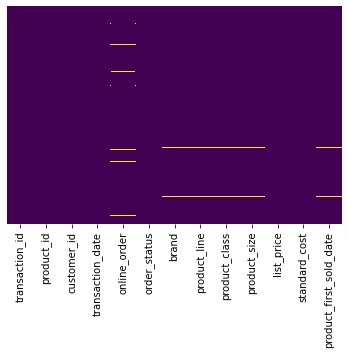

In [0]:
sns.heatmap(transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [62]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
order_status_Approved        0
order_status_Cancelled       0
dtype: int64

In [64]:
print((sheet2.isna().sum()/len(sheet2))*100)   #in percentage

transaction_id             0.000000
product_id                 0.000000
customer_id                0.000000
transaction_date           0.000000
online_order               1.799910
order_status               0.000000
brand                      0.984951
product_line               0.984951
product_class              0.984951
product_size               0.984951
list_price                 0.000000
standard_cost              0.984951
product_first_sold_date    0.984951
dtype: float64


In [102]:
 #sanity check
transactions.duplicated().sum()

0

Which month was the best in terms of **Approved** transaction in 2017?

In [36]:
transactions.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [0]:
transactions=pd.get_dummies(transactions,columns=['order_status'])

In [58]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_status_Approved,order_status_Cancelled
1,1,2,2950,2017-02-25 00:00:00,False,Solex,Standard,medium,medium,71.49,53.62,41245,1,0
2,2,3,3120,2017-05-21 00:00:00,True,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,1,0
3,3,37,402,2017-10-16 00:00:00,False,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,1,0
4,4,88,3135,2017-08-31 00:00:00,False,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,1,0
5,5,78,787,2017-10-01 00:00:00,True,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,1,0


In [59]:
transactions.order_status_Approved.cumsum()  #out of 20000 orders only 19821 are approved

1            1
2            2
3            3
4            4
5            5
         ...  
19996    19817
19997    19818
19998    19819
19999    19820
20000    19821
Name: order_status_Approved, Length: 20000, dtype: uint64

In [0]:
transactions_adj=transactions[transactions['order_status_Cancelled'] !=1]  #drop rows that contain cancelled orders

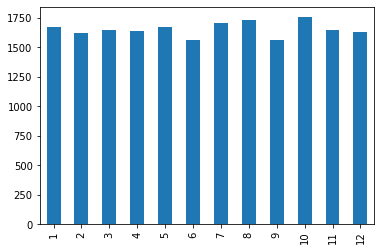

In [61]:
transactions_adj.transaction_date.dt.month.value_counts(sort=False).plot(kind='bar')
plt.show()

so the best month in terms of approved transactions is Oct. We can also spot a relatively flat trend over 2017

What follows are some statistics for EDA of Transactions Data

In [0]:
import seaborn as sns

1163.89
-0.1258038249318863


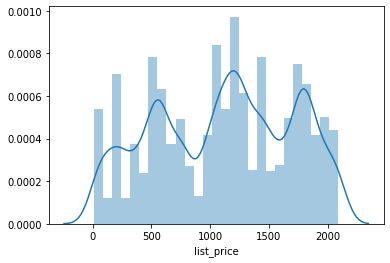

In [81]:
sns.distplot(sheet2.list_price)  #tri-modal dist it implies that mean price is not a good indicator
print(sheet2.list_price.quantile(0.5))  #median price is 1163.89 dollars
print(sheet2.list_price.skew()) #skewness of distrib

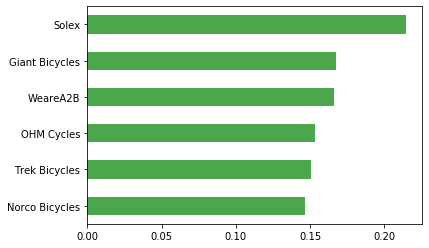

In [0]:
sheet2.brand.value_counts(normalize=True,ascending=True).plot(kind='barh', color='g', alpha=0.7)

Important to check two things:
1.   differnt formats of missing values
2.   misplaced data (ex strings in numerica data columns)


In [0]:
pd.to_numeric(sheet2.list_price, errors='coerce').notnull().all()

True

In [0]:
sheet2.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

transaction_id              True
product_id                  True
customer_id                 True
transaction_date            True
online_order               False
brand                      False
product_line               False
product_class              False
product_size               False
list_price                  True
standard_cost              False
product_first_sold_date    False
order_status_Approved       True
order_status_Cancelled      True
dtype: bool

standard cost should be numeric

In [0]:
transactions_new=pd.get_dummies(transactions,columns=['online_order'])

In [78]:
transactions_new.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'order_status_Approved',
       'order_status_Cancelled', 'online_order_False', 'online_order_True'],
      dtype='object')

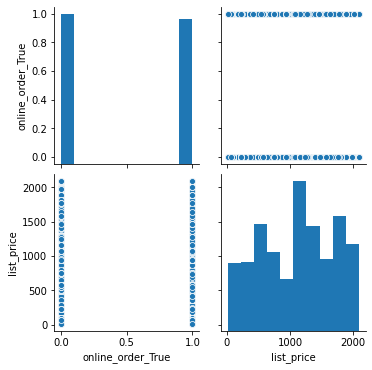

In [79]:
sns.pairplot(transactions_new[['online_order_True','list_price']])

apparently is not true that online orders record noticeably smaller list price. The intention was to infer the missing values of online order based on price ranges. Given the small amount (around 2%) of missing values we can easily fill them in case we need it for further analysis.

# **New customers Data**

In [85]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.70312


In [98]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1001 non-null   object
 1   last_name                            972 non-null    object
 2   gender                               1001 non-null   object
 3   past_3_years_bike_related_purchases  1001 non-null   object
 4   DOB                                  984 non-null    object
 5   job_title                            895 non-null    object
 6   job_industry_category                836 non-null    object
 7   wealth_segment                       1001 non-null   object
 8   deceased_indicator                   1001 non-null   object
 9   owns_car                             1001 non-null   object
 10  tenure                               1001 non-null   object
 11  address                              1001 n

the following to remove the three unnamed columns

In [0]:
new_customer_lists=new_customer_lists[['first_name','last_name',
                                    'gender',
       'past_3_years_bike_related_purchases',
                                       'DOB',
                                 'job_title',
                     'job_industry_category',
                            'wealth_segment',
                        'deceased_indicator',
                                  'owns_car',
                                    'tenure',
                                   'address',
                                  'postcode',
                                     'state',
                                   'country',
                        'property_valuation',
                                      'Rank',
                                     'Value']]

In [100]:
new_customer_lists.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [101]:
new_customer_lists.duplicated().sum()

0

no duplicated values

In [104]:
new_customer_lists.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [162]:
new_customer_lists['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [163]:
new_customer_lists['gender'].str.replace('U','Unspecified')

1         Male
2         Male
3       Female
4       Female
5       Female
         ...  
996       Male
997       Male
998     Female
999       Male
1000      Male
Name: gender, Length: 1000, dtype: object

In [164]:
new_customer_lists.job_industry_category.value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

# **Customer Demographics**

In [170]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  owns_car                             4000 non-null   object
 11  tenure                               3913 n

In [165]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [0]:
customer_demographic = customer_demographic.drop('default', axis=1) #"default" column was non informative

In [167]:
customer_demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [0]:
customer_demographic['gender'] = customer_demographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

**Merging Data**

basically last customer id of customer demographic data is 4000. By creating a new customer id column on New customer lists we can merge the datasets.

In [0]:
new_customer_lists.insert(0,'customer_id', range(4001, 4001 + len(new_customer_lists)))

In [179]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,4003,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312
5,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.70312


In [0]:
customer = pd.merge(customer_demographic, customer_add, how='left', on='customer_id')

In [180]:
customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211,QLD,Australia,9
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,New South Wales,Australia,4


In [181]:
customer.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


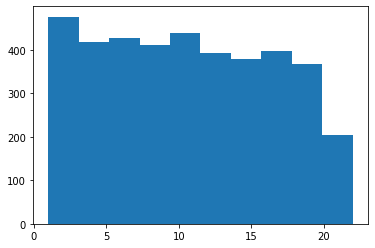

In [186]:
plt.hist(customer.tenure)

In [0]:
customer.tenure=customer.tenure.fillna(customer.tenure.mean())

In [182]:
customer_add.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64